In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from src.models.SIRM import sweep_pol_SPB_SIRM, sweep_pol_mean_SIRM
from src.models.SIRM_D import sweep_pol_SPB_SIRM_D, sweep_pol_mean_SIRM_D
from src.utils.distributions import pol_to_alpha, homogeneous_distribution
from plot_functions import *
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import os

path_Plot_with_labels = "../figures/with_labels/"
path_Plot_without_labels = "../figures/no_labels/"

if not os.path.exists(path_Plot_with_labels):
    os.makedirs(path_Plot_with_labels)

if not os.path.exists(path_Plot_without_labels):
    os.makedirs(path_Plot_without_labels)
def ALPHAS(Np):
    return pol_to_alpha(np.linspace(1/Np/2, 1-1/Np/2, Np)/4)



my_hot_r = discretize_cmaps('hot_r', 10)
my_hot_r.set_bad('gray')

my_vir_r = discretize_cmaps('viridis_r', 10)
my_vir_r.set_bad('gray')

In [11]:
# color palettes

CP1 = ['#7b3294','#c2a5cf','#000','#a6dba0','#008837']
CP1 = ['#d9f0a3','#78c679','#000','#238443','#004529']      # MEAN
CP2 = ['#fdbb84','#fc8d59','#ef6548','#d7301f','#990000']   # POL
CP3 = ['#a6bddb','#74a9cf','#000','#0570b0','#034e7b']      # HOM

In [12]:
NP = 100
NS = 100

susc_max_range={"m": 0.2, "M": 0.6, "n": NS}
pol_range={"m": 0, "M": 1, "n": NP}

results = sweep_pol_SPB_SIRM(
    susc_max_range=susc_max_range,
    pol_range=pol_range,
    h=0,
    dT=1,
    T=1000,
    batch_size=1000,
    N_COMPARTMENTS = 100,
    SPB_exponent=1
)

(S_final, I_final, R_final), R0, OH = results
S = np.sum(S_final, axis=1)
I = np.sum(I_final, axis=1)
R = np.sum(R_final, axis=1)

S = S.reshape(NP, NS).transpose()
I = I.reshape(NP, NS).transpose()
R = R.reshape(NP, NS).transpose()
R0 = R0.reshape(NP, NS).transpose()
OH = OH.reshape(NP, NS).transpose()

FIG_A_RI = R + I
FIG_A_R0 = R0
FIG_A_OH = OH

In [13]:
NP = 100
NS = 100

susc_max_range={"m": 0.2, "M": 0.6, "n": NS}
pol_range={"m": 0, "M": 1, "n": NP}

results = sweep_pol_SPB_SIRM_D(
    susc_max_range=susc_max_range,
    pol_range=pol_range,
    dT=1,
    T=1000,
    batch_size=1000,
    N_COMPARTMENTS = 100,
    SPB_exponent=1
)

(S_final, I_final, R_final), R0, OH = results
S = np.sum(S_final, axis=1)
I = np.sum(I_final, axis=1)
R = np.sum(R_final, axis=1)

S = S.reshape(NP, NS).transpose()
I = I.reshape(NP, NS).transpose()
R = R.reshape(NP, NS).transpose()
R0 = R0.reshape(NP, NS).transpose()
OH = OH.reshape(NP, NS).transpose()

FIG_B_RI = R + I
FIG_B_R0 = R0
FIG_B_OH = OH

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


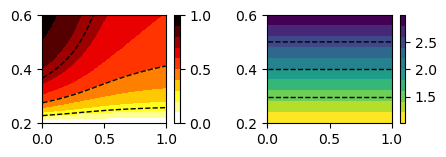

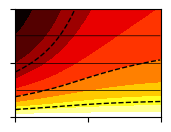

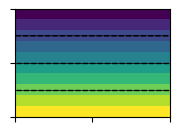

In [16]:
beta_1 = np.linspace(0.2, 0.6, NS)
pol = np.linspace(0+1/NP/2,1-1/NP/2, NP)/4
name = "I(pol,beta)_SIRB.pdf"


fig, ax = plt.subplots(1,2, figsize=(2*Lx, Ly))


cax = ax[0].imshow(FIG_A_RI, cmap =  my_hot_r, aspect = "auto", origin = "lower", extent = [0,1,0.2,0.6], vmin = 0, vmax = 1)
cbar = fig.colorbar(cax, ax = ax[0])
CS = ax[0].contour(pol*4, beta_1,FIG_A_RI, levels = [0.25, 0.5, 0.75], linewidths = 1, colors = "black", linestyles = "dashed")

cax = ax[1].imshow(FIG_A_R0, cmap =  my_vir_r, aspect = "auto", origin = "lower", extent = [0,1,0.2,0.6])
cbar = fig.colorbar(cax, ax = ax[1])

CS = ax[1].contour(pol*4, beta_1,FIG_A_R0, levels = [1, 1.5, 2, 2.5], linewidths = 1, colors = "black", linestyles = "dashed")


fig.tight_layout()


name = "I(pol,beta)_SIRB.pdf"

fig, ax = plt.subplots(figsize=(Lx, Ly))
cax = ax.imshow(FIG_A_RI, cmap =  my_hot_r, aspect = "auto", origin = "lower", extent = [0,1,0.2,0.6], vmin = 0, vmax = 1)
cbar = fig.colorbar(cax, ax = ax)
CS = ax.contour(pol*4, beta_1,FIG_A_RI, levels = [0.25, 0.5, 0.75], linewidths = 1, colors = "black", linestyles = "dashed")
CS = ax.contour(pol*4, beta_1,FIG_A_R0, levels = [1.5, 2, 2.5], linewidths = 0.5, colors = "black")
fig.tight_layout()
double_savefig(fig, ax, name, path_Plot_with_labels, path_Plot_without_labels, cbar=cbar)

name = "R0(pol,beta)_SIRB.pdf"

fig, ax = plt.subplots(figsize=(Lx, Ly))
cax = ax.imshow(FIG_A_R0, cmap =  my_vir_r, aspect = "auto", origin = "lower", extent = [0,1,0.2,0.6])
cbar = fig.colorbar(cax, ax = ax)
CS = ax.contour(pol*4, beta_1,FIG_A_R0, levels = [1, 1.5, 2, 2.5], linewidths = 1, colors = "black", linestyles = "dashed")
CS = ax.contour(pol*4, beta_1,FIG_A_R0, levels = [1.5, 2, 2.5], linewidths = 0.5, colors = "black")
fig.tight_layout()
double_savefig(fig, ax, name, path_Plot_with_labels, path_Plot_without_labels, cbar=cbar)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


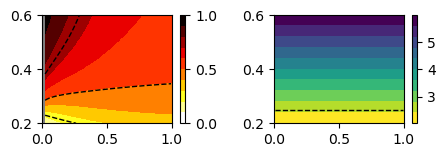

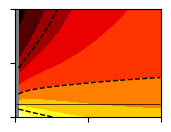

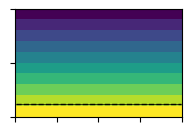

In [15]:
beta_1 = np.linspace(0.2, 0.6, NS)
pol = np.linspace(0+1/NP/2,1-1/NP/2, NP)/4
name = "I(pol,beta)_SIRB.pdf"


fig, ax = plt.subplots(1,2, figsize=(2*Lx, Ly))


cax = ax[0].imshow(FIG_B_RI, cmap =  my_hot_r, aspect = "auto", origin = "lower", extent = [0,1,0.2,0.6], vmin = 0, vmax = 1)
cbar = fig.colorbar(cax, ax = ax[0])
CS = ax[0].contour(pol*4, beta_1,FIG_B_RI, levels = [0.25, 0.5, 0.75], linewidths = 1, colors = "black", linestyles = "dashed")

cax = ax[1].imshow(FIG_B_R0, cmap =  my_vir_r, aspect = "auto", origin = "lower", extent = [0,1,0.2,0.6])
cbar = fig.colorbar(cax, ax = ax[1])

CS = ax[1].contour(pol*4, beta_1,FIG_B_R0, levels = [1, 1.5, 2, 2.5], linewidths = 1, colors = "black", linestyles = "dashed")


fig.tight_layout()


name = "I(pol,beta)_SIRB.pdf"

fig, ax = plt.subplots(figsize=(Lx, Ly))
cax = ax.imshow(FIG_B_RI, cmap =  my_hot_r, aspect = "auto", origin = "lower", extent = [0,1,0.2,0.6], vmin = 0, vmax = 1)
cbar = fig.colorbar(cax, ax = ax)
CS = ax.contour(pol*4, beta_1,FIG_B_RI, levels = [0.25, 0.5, 0.75], linewidths = 1, colors = "black", linestyles = "dashed")
CS = ax.contour(pol*4, beta_1,FIG_B_R0, levels = [1.5, 2, 2.5], linewidths = 0.5, colors = "black")
fig.tight_layout()
double_savefig(fig, ax, name, path_Plot_with_labels, path_Plot_without_labels, cbar=cbar)

name = "R0(pol,beta)_SIRB.pdf"

fig, ax = plt.subplots(figsize=(Lx, Ly))
cax = ax.imshow(FIG_B_R0, cmap =  my_vir_r, aspect = "auto", origin = "lower", extent = [0,1,0.2,0.6])
cbar = fig.colorbar(cax, ax = ax)
CS = ax.contour(pol*4, beta_1,FIG_B_R0, levels = [1, 1.5, 2, 2.5], linewidths = 1, colors = "black", linestyles = "dashed")
CS = ax.contour(pol*4, beta_1,FIG_B_R0, levels = [1.5, 2, 2.5], linewidths = 0.5, colors = "black")
fig.tight_layout()
double_savefig(fig, ax, name, path_Plot_with_labels, path_Plot_without_labels, cbar=cbar)

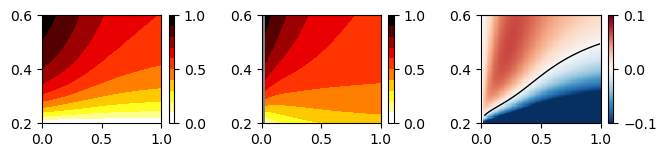

In [50]:
fig, axs = plt.subplots(1,3, figsize=(3*Lx, Ly))
im0 = axs[0].imshow(FIG_A_RI, cmap =  my_hot_r, aspect = "auto", origin = "lower", extent = [0,1,0.2,0.6], vmin = 0, vmax = 1)
im1 = axs[1].imshow(FIG_B_RI, cmap =  my_hot_r, aspect = "auto", origin = "lower", extent = [0,1,0.2,0.6], vmin = 0, vmax = 1)
im2 = axs[2].imshow(FIG_A_RI - FIG_B_RI, cmap =  "RdBu_r", aspect = "auto", origin = "lower", extent = [0,1,0.2,0.6], vmin = -0.1, vmax = 0.1, interpolation = "none")
# plot contour lines in axs2

cs = axs[2].contour(pol*4, beta_1, FIG_A_RI - FIG_B_RI, levels = [0], linewidths = 1, colors = "black", linestyles = "solid")

# add colorbar to axs2
cbar = fig.colorbar(im0, ax=axs[0])
cbar = fig.colorbar(im1, ax=axs[1])
cbar = fig.colorbar(im2, ax=axs[2])


fig.tight_layout()

# Here what Viola requested

In [112]:
NP = 1000
NS = 1
N_COMPARTMENTS = 100

susc_max_range={"m": 0.5, "M": 0.5, "n": NS}
pol_range={"m": 0, "M": 1, "n": NP}

results = sweep_pol_SPB_SIRM_D(
    susc_max_range=susc_max_range,
    pol_range=pol_range,
    dT=1,
    T=1000,
    batch_size=1000,
    N_COMPARTMENTS = N_COMPARTMENTS,
    SPB_exponent=1
)

(S_final, I_final, R_final), _, _ = results

S = S_final.reshape(NP, N_COMPARTMENTS).transpose()
I = I_final.reshape(NP, N_COMPARTMENTS).transpose()
R = R_final.reshape(NP, N_COMPARTMENTS).transpose()

Sf = np.zeros((N_COMPARTMENTS, NP))
If = np.zeros((N_COMPARTMENTS, NP))
Rf = np.zeros((N_COMPARTMENTS, NP))
for i in range(NP):

    N_i = S_final[i,:] + I_final[i,:] + R_final[i,:]
    Sf[:,i] = S_final[i,:]/N_i
    If[:,i] = I_final[i,:]/N_i
    Rf[:,i] = R_final[i,:]/N_i

# normalize them: N_i = S

RI_D = Rf + If




results = sweep_pol_SPB_SIRM(
    susc_max_range=susc_max_range,
    pol_range=pol_range,
    dT=1,
    T=1000,
    batch_size=1000,
    N_COMPARTMENTS = N_COMPARTMENTS,
    SPB_exponent=1
)

(S_final, I_final, R_final), _, _ = results

S = S_final.reshape(NP, N_COMPARTMENTS).transpose()
I = I_final.reshape(NP, N_COMPARTMENTS).transpose()
R = R_final.reshape(NP, N_COMPARTMENTS).transpose()

Sf = np.zeros((N_COMPARTMENTS, NP))
If = np.zeros((N_COMPARTMENTS, NP))
Rf = np.zeros((N_COMPARTMENTS, NP))
for i in range(NP):

    N_i = S_final[i,:] + I_final[i,:] + R_final[i,:]
    Sf[:,i] = S_final[i,:]/N_i
    If[:,i] = I_final[i,:]/N_i
    Rf[:,i] = R_final[i,:]/N_i

# normalize them: N_i = S


RI = Rf + If


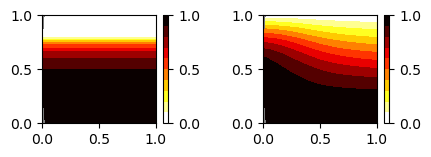

In [113]:
RI.shape
fig, axs = plt.subplots(1,2, figsize=(2*Lx, Ly))

im0 = axs[0].imshow(RI_D, cmap =  my_hot_r, aspect = "auto", origin = "lower", extent = [0,1,0,1], vmin = 0, vmax = 1)
cbar = fig.colorbar(im0, ax = axs[0])

im1 = axs[1].imshow(RI, cmap =  my_hot_r, aspect = "auto", origin = "lower", extent = [0,1,0,1], vmin = 0, vmax = 1)
cbar = fig.colorbar(im1, ax = axs[1])

fig.tight_layout()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


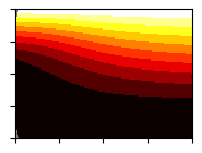

In [114]:
name = "RI_fraction_SIRM.pdf"
fig, ax = plt.subplots(figsize=(Lx, Ly))
cax = ax.imshow(RI, cmap =  my_hot_r, aspect = "auto", origin = "lower", extent = [0,1,0,1], vmin = 0, vmax = 1, interpolation = "none")
cbar = fig.colorbar(cax, ax = ax)

double_savefig(fig, ax, name, path_Plot_with_labels, path_Plot_without_labels, cbar=cbar)

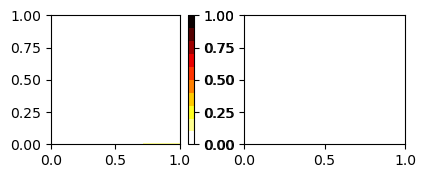

In [84]:
fig, ax = plt.subplots(1,2, figsize=(2*Lx, Ly))
im0 = ax[0].imshow(RI_D, cmap =  my_hot_r, aspect = "auto", origin = "lower", extent = [0,1,0,1], vmin = 0, vmax = 1)
cbar = fig.colorbar(im0, ax = ax[0])

In [52]:
S

Array(4.1058693, dtype=float32)

In [ ]:
RI_0 = FIG_A_RI
RI_1 = FIG_B_RI 